## **Lab13 - Segmentation: KMeans**
**Grup:** 9

Adriana Avilés (1676127),

Anna Garcia (1665817),

David Morillo (1666540),

Paula Franco (1674234)

Els objectius d'aquest laboratori són:

- Entendre com funciona l'algorisme de K-means.
- Treballar amb el mòdul KMeans que ens proporciona la llibreria sklearn.
- Quantització d'una imatge mitjançant K-means.
- Segmentació d'una imatge utilitzant K-means.
- Experimentar amb els paràmetres de la funció KMeans.




## Importem les llibreries necessaries.

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skimage
from sklearn.cluster import KMeans
import cv2 
from PIL import Image
import time
import cv2 as cv

In [77]:
def display_256(img):
    plt.imshow(img, vmin = 0, vmax = 255)

# Funcionament de l'algorisme de K-means

 K-means és un algorisme de classificació no supervisada (clusterització) que agrupa objectes en k grups basant-se en les seves característiques. El grup o clúster és determinat minimitzant la suma de les distàncies entre cada objecte i el centroid del seu grup. Normalment, s'utilitza la distància quadràtica.

L'algorisme consta de tres passos:

1. Inicialització: Un cop determinat el nombre de grups, k, es col·loquen k centroides a l'espai de les dades, per exemple, escollint-los de manera aleatòria.
2. Assignació d'objectes als centroides: Cada objecte de les dades és assignat al centroid més proper.
3. Actualització dels centroides: La posició del centroid de cada grup s'actualitza prenent com a nou centroid la posició de la mitjana dels objectes que pertanyen a aquest grup.

Aquests passos 2 i 3 es repeteixen fins que els centroides no es mouen, o es mouen per sota d'una distància umbral en cada pas.

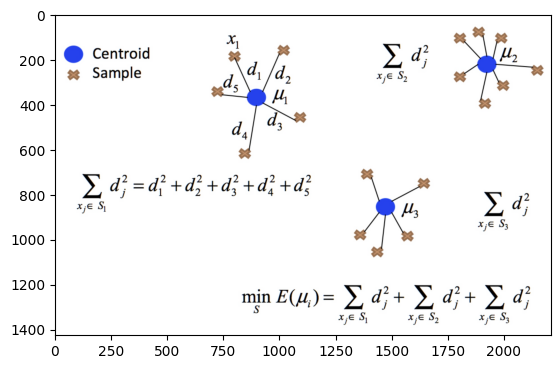

In [78]:
display_256(cv2.imread('teoria.jpg'))


L'algorisme K-means resol un problema d'optimització, on la funció a minimitzar és la suma de les distàncies quadràtiques de cada objecte al centroid del seu clúster.

## **Tasca 1 - Quantització d'una imatge mitjançant K-means.  (3 punts)**


En aquesta tasca, utilitzarem l'algorisme K-means per reduir el nombre de colors d'una imatge, un procés conegut com a quantització d'imatges. La quantització d'imatges és una tècnica de processament d'imatges que consisteix a reduir el nombre de colors utilitzats en una imatge, mentre es manté el seu aspecte visual general. Per tant, una de les aplicacions de K-Means és la compressió de dades.

1. Carregareu una imatge i convertiu-la a RGB utilitzant la llibreria cv2.

In [79]:
tenda = cv2.imread('tenda.jpg')
tenda = cv2.cvtColor(tenda, cv2.COLOR_BGR2RGB)

2. Comproveu i mostreu per pantalla les dimensions de la imatge (files, columnes i canals).

In [80]:
print(f'Files: {tenda.shape[0]}, Columnes: {tenda.shape[1]}, Canals: {tenda.shape[2]}')

Files: 427, Columnes: 640, Canals: 3


3. Creeu un array amb tantes files com píxels i, per a cada fila, 3 columnes, una per a cada intensitat de color (vermell, verd i blau).

In [81]:
X = tenda.reshape(-1, 3)
print(f'Files: {X.shape[0]}, Columnes: {X.shape[1]}')

Files: 273280, Columnes: 3


4. Compteu el nombre de colors de la imatge.

In [82]:
colors = np.unique(tenda, axis=0, return_counts=True)
num_colors = colors[0].shape[0]
print (f'Número de colors = {num_colors}')

Número de colors = 427


5. Inicialitzeu i ajusteu el model de K-means. En aquesta part, agrupareu els 427 colors en k grups, que es corresponen amb els centroids obtinguts amb el K-means.

In [83]:
k = 2
k_means = KMeans(n_clusters=k, n_init=10) # n_init és un paràmetre de KMeans i ha de ser igual a 10
model = k_means.fit(X)

6. Els centroids finals són els nous colors i cada píxel té ara una etiqueta que indica a quin grup o clúster pertany.

In [84]:
centroids = model.cluster_centers_
etiquetes = model.labels_

print(f'dimensiones centroides: {centroids.shape}')
print(f'dimensiones etiquetas: {etiquetes.shape}')

dimensiones centroides: (2, 3)
dimensiones etiquetas: (273280,)


7. Reconstruïu la imatge quantitzada utilitzant els centroides i les etiquetes dels clusters. Tingueu en compte que ha de tenir les mateixes dimensions que la imatge original.

In [85]:
imatge_quantitzada = centroids[etiquetes]
imatge_quantitzada = imatge_quantitzada.reshape(tenda.shape[0], tenda.shape[1], -1).astype(np.uint8)

8. Mostreu la imatge original i la imatge comprimida.

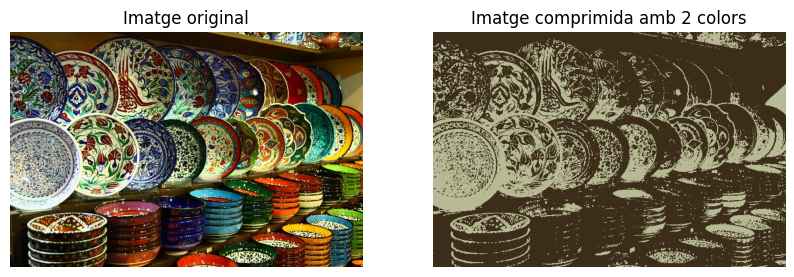

In [86]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
display_256(tenda)
plt.axis('off')
plt.title('Imatge original')

plt.subplot(1, 2, 2)
display_256(imatge_quantitzada)
plt.title(f'Imatge comprimida amb {k} colors')
plt.axis('off')
plt.show()

8. Calculeu el tamany de cada imatge en Bytes. Per fer-ho, podeu utilitzar la fórmula: 

   $$ \text{Tamany en bytes} = \frac{{\text{Amplada de la imatge} \times \text{Alçada de la imatge} \times \text{Profunditat de bits per píxel}}}{{8}} $$

   Recordeu que les imatges RGB es representen amb 24 bits per píxel. En canvi, la imatge comprimida amb K-Means es representa amb \(x\) bits per píxel, sent \(2^x=k\). 
   En aquest cas, \(2^x=4\).


In [87]:
def tamany_bytes(w, h, k):
    return (w * h * k)/8

tamany_original = tamany_bytes(tenda.shape[0], tenda.shape[1], 3*8) # 3*8 perquè tenim 3 canals de 8 bits
tamany_kmeans = tamany_bytes(imatge_quantitzada.shape[0], imatge_quantitzada.shape[1], k) # k perquè tenim k colors

print(f'Tamany de la imatge original: {tamany_original} Bytes.\nTamany de la imatge comprimida utilitzant kmeans: {tamany_kmeans} Bytes.')

Tamany de la imatge original: 819840.0 Bytes.
Tamany de la imatge comprimida utilitzant kmeans: 68320.0 Bytes.


9. Calculeu la taxa de compressió: R=|M|/|C|, sent M el tamany de la imatge original i C el tamany de la imatge comprimida mitjançant K-Means.

In [88]:
R = tamany_original/tamany_kmeans
print(f'La taxa de compressió és {R}')

assert R>=0, "La taxa de compressió ha de ser positiva!"

La taxa de compressió és 12.0


**El resultat de la taxa de compressió és coherent? Què signifca?**

**Resposta: És coherent ja que és un nombre positiu, i a més ens indica la seva bona eficiència, ja que és major de 1 (12). Significa que la nova imatge ocupa 1/R (1/12 = 0.0833) vegades que l'original. És a dir, que podem guardar R=12 imatges més amb aquesta compressió**

## **Tasca 2 - Experimenteu amb  els paràmetres de la funció K-means  (2 punts)**

Per aquesta tasca, generareu la funció plot_elbow_with_fit_time, la qual us permetrà determinar el nombre òptim de clústers (k) per a un conjunt de dades utilitzant el mètode del colze (Elbow Method) i considerarà tant la distorsió (inèrcia) com el temps d'ajust. Aquesta funció realitzarà les següents operacions:

1. **Càlcul de Distorsió i Temps d'Ajustament:**
   - Per a cada valor de \( k \) especificat, s'ajusta un model `KMeans` a les dades.
   - Es calcula la distorsió (inèrcia), que mesura la compactació dels clústers.
   - Es mesura el temps que triguen a ajustar-se els models (temps d'ajust).

2. **Normalització de Mètriques:**
   - La distorsió i el temps d'ajust es normalitzen per portar-los a la mateixa escala.

3. **Combinació de Mètriques:**
   - Es calcula una puntuació combinada sumant les distorsions i els temps d'ajust normalitzats.

4. **Determinació del \( k \) Òptim:**
   - El valor de \( k \) que minimitza la puntuació combinada es considera el nombre òptim de clústers.

5. **Visualització:**
   - Es crea un gràfic amb dues línies:
     - Una línia blava que mostra la distorsió per a cada valor de \( k \).
     - Una línia vermella que mostra el temps d'ajust per a cada valor de \( k \).
   - S'afegeix una línia vertical discontínua per indicar el valor òptim de \( k \).
   - La llegenda del gràfic inclou el valor òptim de \( k \) i la puntuació combinada corresponent.

A continuació mostrem la fórmula següent per calcular la distorsió:

$$
\text{Distorsió} = \sum_{i=0}^{n} \min_{\mu_j \in C}(||x_i - \mu_j||^2)
$$

On:

- n és el nombre total de mostres.
- C és el conjunt de clústers.
- $\mu_j$ és el centroide del clúster \(j\).

- $ \text{La distància euclidiana al quadrat entre el punt }x_i \text{ i el centroid del clúster } j \text{ es calcula com } ||x_i - \mu_j||^2. $




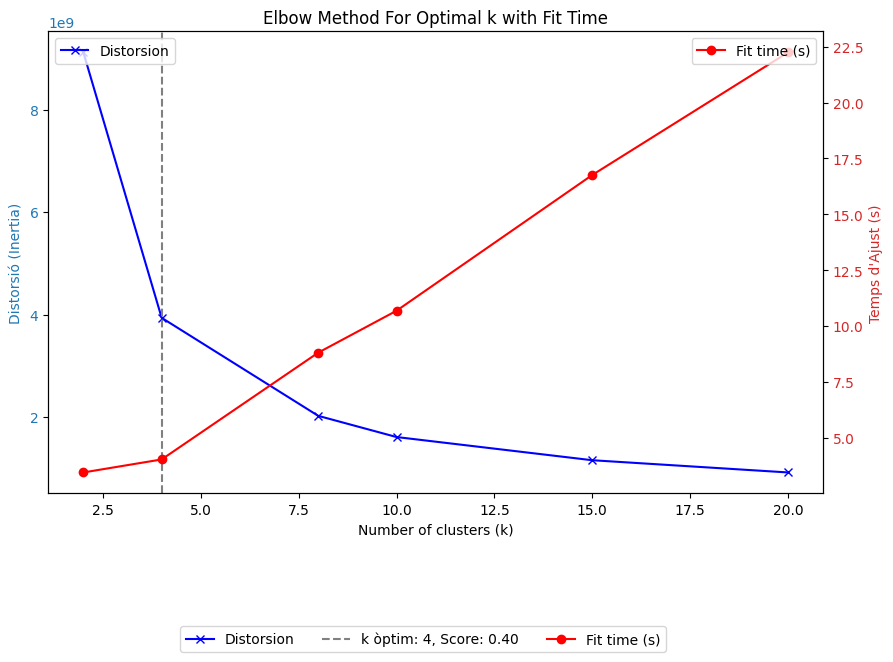

In [89]:
def plot_elbow_with_fit_time(X, k_values):
    distortions = []
    fit_times = []

    for k in k_values:
        start_time = time.time()
        kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
        kmeans.fit(X)
        end_time = time.time()
        
        distortions.append(kmeans.inertia_)
        fit_times.append(end_time - start_time)
    
    # Normalitzar les mètriques
    distortions = np.array(distortions)
    fit_times = np.array(fit_times)
    normalized_distortions = (distortions - distortions.min()) / (distortions.max() - distortions.min())
    normalized_fit_times = (fit_times - fit_times.min()) / (fit_times.max() - fit_times.min())
    
    # Combinar les mètriques
    combined_scores = normalized_distortions + normalized_fit_times
    
    optimal_k = k_values[combined_scores.argmin()]
    # Obteniu el valor òptim (el que minimitza el sumatori: normalized_distortions + normalized_fit_times)
    optimal_score = combined_scores.min()
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Distorsió (Inertia)', color=color)
    ax1.plot(k_values, distortions, 'bx-', label='Distorsion')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Temps d\'Ajust (s)', color=color)
    ax2.plot(k_values, fit_times, 'ro-', label='Fit time (s)')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    plt.title('Elbow Method For Optimal k with Fit Time')
    ax1.axvline(x=optimal_k, color='grey', linestyle='--', label=f'k òptim: {optimal_k}, Score: {optimal_score:.2f}')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
    plt.show()
    return optimal_k

k_values = [2, 4, 8, 10, 15, 20]
IMG1=skimage.io.imread("https://s1.1zoom.me/big0/140/374951-svetik.jpg")
X = IMG1.reshape(-1, 3)
optimal_k = plot_elbow_with_fit_time(X, k_values)


In [90]:
best_model = KMeans(n_clusters= optimal_k, n_init= 10) #n_clusters = la millor k 
best_model.fit(X)
segmented_img_1 = best_model.cluster_centers_[best_model.labels_]
segmented_img_1 = segmented_img_1.reshape(IMG1.shape).astype(np.uint8)

5. Mostreu els resultats.

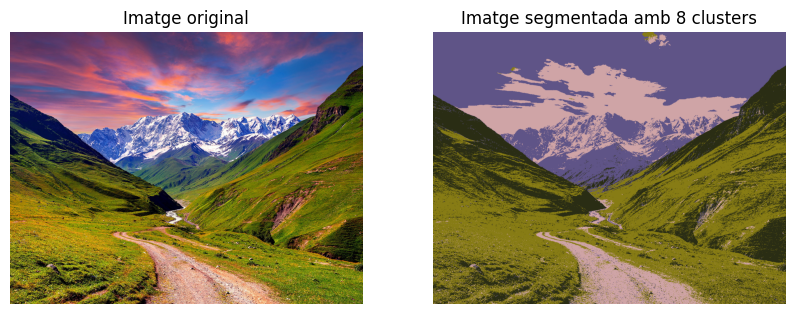

In [91]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
display_256(IMG1)
plt.axis('off')
plt.title('Imatge original')

plt.subplot(1, 2, 2)
display_256(segmented_img_1)
plt.title(f'Imatge segmentada amb {8} clusters')
plt.axis('off')
plt.show()

**1. Quin és el valor òptim de k segons la funció?**

**Resposta: 4**  


  

**2. Com afecta el número de clústers al temps d'ajust (temps de convergència) segons la gràfica?**

**Resposta: Augmenta de manera lineal i proporcional a k (pel que es pot observar al gràfic)** 

## **Tasca 3 - Càlcul de la superficie d'un llac (5 punts)**

En l'exercici anterior hem vist una de les moltes aplicacions de l'algorisme K-Means. A continuació, en veurem una altra: segmentarem la imatge demogràfica d'un llac vist des del cel per calcular la seva superífice.

1. Carregueu la imatge del llac i convertiu-la en blanc i negre.

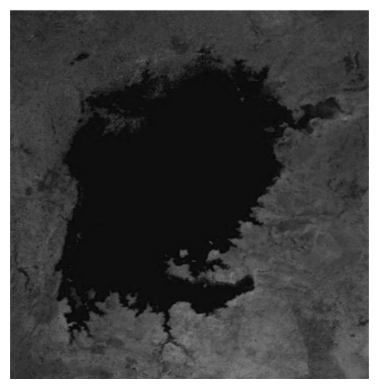

In [92]:
llac = cv.imread('llac.jpg')

# Converteix la imatge de BGR a RGB
llac = cv.cvtColor(llac, cv.COLOR_BGR2RGB)

llac_BW = cv.cvtColor(llac, cv.COLOR_BGR2GRAY)
llac_BW = np.asarray(llac_BW,dtype=np.float32)

# visualitzem l'imatge en blanc i negre
plt.imshow(llac_BW,cmap='gray')
plt.axis('off')
plt.show()

2. Convertiu la imatge a un array de numpy i assegureu-vos que el tipus de dades sigui float32

In [93]:
X = np.asarray(llac_BW, dtype=np.float32)

3. Obtingueu les dimensions de la matriu X

In [94]:
rows, columns = X.shape
print(f'Dimensions de X: {X.shape}')

Dimensions de X: (872, 846)


4. Redimensioneu la matriu X per tenir una sola dimensió.


In [95]:
X = X.reshape(-1, 1)
print(f'Dimensions de X: {X.shape}')

Dimensions de X: (737712, 1)


5. Apliqueu l'algoritme KMeans amb 3 clústers (negre, gris,blanc). Per obtenir els mateixos resultats, utilitzareu el random_state = 42.

In [96]:
k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
model = k_means.fit(X)

6. Remodeleu la imatge segmentada perquè tingui les mateixes dimensions que la imatge original

In [97]:
segmented_img = model.cluster_centers_[model.labels_]
segmented_img = segmented_img.reshape(872, 846).astype(np.uint8)

7. Normalitzeu els valors de la imatge utilitzant la normalització MinMax.

In [98]:
segmented_img = cv2.normalize(segmented_img, None, 0, 255, cv2.NORM_MINMAX)

8. Calculeu els colors i les seves freqüències.

In [99]:
colors = np.unique(segmented_img, return_counts=True)
print(colors)
freq_negres = colors[1][0] #pixels de color negre
freq_grisos = colors[1][1] #pixels de color gris
freq_blancs = colors[1][2] #pixels de color blanc

(array([  0, 145, 255], dtype=uint8), array([249625, 369626, 118461], dtype=int64))


9. Mostreu els resultats

In [100]:
print(freq_negres, 'píxels per a la intensitat', colors[0][0], ', és a dir, negre')
print(freq_grisos, 'píxels per a la intensitat', colors[0][1], ', és a dir, gris')
print(freq_blancs, 'píxels per a la intensitat', colors[0][2], ', és a dir, blanc')


249625 píxels per a la intensitat 0 , és a dir, negre
369626 píxels per a la intensitat 145 , és a dir, gris
118461 píxels per a la intensitat 255 , és a dir, blanc


Dimensions de l"imatge segmentada: (872, 846)


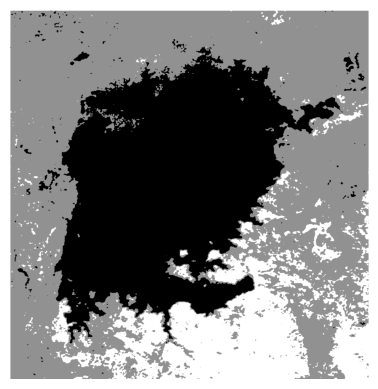

In [101]:
print(f'Dimensions de l"imatge segmentada: {segmented_img.shape}')
plt.imshow(segmented_img,cmap='gray')
plt.axis('off')  # Para ocultar los ejes
plt.show()

Com podem comprovar a la imatge, hi ha píxels de color negre que estan totalment fora de la frontera del llac. Per tant, per obtenir una aproximació de l'àrea, el que farem és cridar a la funció 'comptar_pixels_negres_en_roi'. Aquesta funció ens retornarà el nombre de píxels negres en la regió d'interès que hem determinat.

In [102]:
def comptar_pixels_negres_en_roi(img):

    # Convertir la imatge a RGB per visualització amb matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Definir les coordenades del rectangle ROI
    x, y, amplada, altura = 100, 80, 670, 690

    # Crear la figura i l'eix
    fig, ax = plt.subplots()

    # Mostrar la imatge
    ax.imshow(img_rgb)

    # Dibuixar el rectangle a la imatge
    rect = plt.Rectangle((x, y), amplada, altura, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Mostrar la imatge amb el rectangle
    plt.title('Imatge amb ROI assenyalat')
    plt.axis('off')
    plt.show()

    # Obtenir la regió d'interès (ROI) de la imatge en escala de grisos
    roi = img[y:y+altura, x:x+amplada]

    # Aplicar umbralització per separar les regions d'interès del fons
    _, mask = cv2.threshold(roi, 127, 255, cv2.THRESH_BINARY)

    # Comptar els píxels amb valor de 0 dins de la màscara
    pixels_negres = cv2.countNonZero(cv2.bitwise_not(mask))

    return pixels_negres

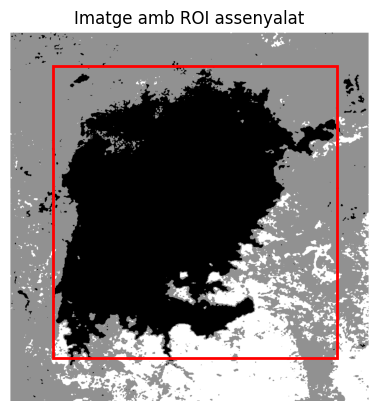

In [103]:
freq_negres = comptar_pixels_negres_en_roi(segmented_img)

10. Calculeu l'àrea del llac. (Tingueu en compte que l'àrea total de la fotografia és de $200000 km^2$ )

In [104]:
print('Àrea =', int(float(200000) * float(freq_negres) / float(segmented_img.shape[0]*segmented_img.shape[1])), 'km2')

Àrea = 66748 km2


**Quina és l'àrea del llac?**

**Resposta: 66748 km2**